<a href="https://colab.research.google.com/github/phuongnguyen99/Spring22_Porject_Math/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import glob 
import numpy as np
import os
from skimage.io import imshow, imread

img_dir = "drive/MyDrive/new_project/data" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 


In [7]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

width = 1028
height = 1028

#Load image by Opencv2

def img_tensor(original_img):
  """ This function is used to read image and convert it into tensor
  - Input:
      original_img: original image 
  - Output:
      image in rgb and its tensor in rgb
  """
  # read image
  img = cv2.imread(original_img)
  # resize
  inp = cv2.resize(img, (width , height ))
  # convert img to RGB
  rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)
  # convert to uint8
  rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)
  rgb_tensor = tf.expand_dims(rgb_tensor , 0)
  return rgb, rgb_tensor

In [13]:
rgb, rgb_tensors = img_tensor(files[170])

In [10]:
# Loading model directly from TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")

# Loading csv with labels of classes
labels = pd.read_csv('labels.csv', sep=';', index_col='ID')
labels = labels['OBJECT (2017 REL.)']

In [14]:
# Creating prediction
boxes, scores, classes, num_detections = detector(rgb_tensors)

# Processing outputs
pred_labels = classes.numpy().astype('int')[0] 
pred_labels = [labels[i] for i in pred_labels]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

# Putting the boxes and labels on the image
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred_labels):
    if score < 0.5:
        continue

    score_txt = f'{100 * round(score)}%'
    img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
    cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)


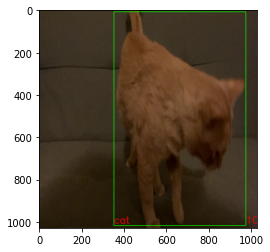

In [15]:
plt.imshow(img_boxes)